In [26]:
import sys
sys.path.insert(0, '../../../../')
import pandas as pd 
import numpy as np
import scipy
import readline
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import (
    f1_score,
    fbeta_score,
    make_scorer,
    recall_score,
    precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from helpers.ipython_helpers import (
    print_full
)
from helpers.train_model_helpers import (
    make_train_and_test_df,
    train_model_by_grid_search_cv,
    train_model_by_random_search_cv,
    make_time_series_iterable,
    f2_score,
    display_all_results,
    plot_confusion_matrix,
    plot_roc_curve
)
from IPython.display import display
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV
)

%matplotlib inline  

# Read Data

In [4]:
train_df = pd.read_csv("../../../../../data/bankruptcy/train_test_data/annual/train_df_annual_12.csv")
test_df = pd.read_csv("../../../../../data/bankruptcy/train_test_data/annual/test_df_annual_12.csv")

In [5]:
x_train, x_test, y_train, y_test = make_train_and_test_df(train_df, test_df)

In [46]:
def train_model_by_grid_search_cv(x_train, x_test, y_train, y_test, estimator, score, weight, tuned_parameters, custom_iterable, probability=False):
    print("*****************************************************************************************")
    print("Tuning hyper-parameters for scoring of {0} and class weight of {1}".format(score, weight))

    if score == 'f2':
        score = f2_score
    
    tuned_parameters['class_weight'] = [{True: weight}]
    
    model = GridSearchCV(estimator, tuned_parameters, cv=custom_iterable, scoring=score, verbose=1, n_jobs=-1)
    model.fit(x_train, y_train.values.ravel())

    print("Best parameters set found on development set:")
    print(model.best_params_)
    print()

    y_pred_bin = model.predict(x_test)
    print("F1 Score")
    print(f1_score(y_test, y_pred_bin))

    print("F2 Score")
    print(fbeta_score(y_test, y_pred_bin, beta=2, pos_label=True, average='binary'))

    print("Recall Score")
    print(recall_score(y_test, y_pred_bin))

    print("Precision Score")
    print(precision_score(y_test, y_pred_bin))

    print("Detailed classification report:")
    print(classification_report(y_test, y_pred_bin))
    print()

    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred_bin, ['Active', 'Bankrupt'])
    print()

    if probability:
        print("Roc Curve:")
        y_pred_prob = model.predict_proba(x_test)[:, 1]
        plot_roc_curve(y_test, y_pred_prob)
        print()

    return model

In [43]:
def train_model_by_random_search_cv(x_train, x_test, y_train, y_test, estimator, score, weight, tuned_parameters, custom_iterable, num_iter=10, probability=False):
    print(score, weight)
    print("Tuning hyper-parameters for scoring of {0} and class weight of {1}".format(score, weight))

    if score == 'f2':
        score = f2_score
    
    print(tuned_parameters)
    model = RandomizedSearchCV(estimator, tuned_parameters, cv=custom_iterable, scoring=score, verbose=1, n_iter=num_iter, n_jobs=-1)
    model.fit(x_train, y_train.values.ravel())

    print("Best parameters set found on development set:")
    print(model.best_params_)
    print()

    y_pred_bin = model.predict(x_test)
    print("F1 Score")
    print(f1_score(y_test, y_pred_bin))

    print("F2 Score")
    print(fbeta_score(y_test, y_pred_bin, beta=2, pos_label=True, average='binary'))

    print("Recall Score")
    print(recall_score(y_test, y_pred_bin))

    print("Precision Score")
    print(precision_score(y_test, y_pred_bin))

    print("Detailed classification report:")
    print(classification_report(y_test, y_pred_bin))
    print()

    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred_bin, ['Active', 'Bankrupt'])
    print()

    if probability:
        print("Roc Curve:")
        y_pred_prob = model.predict_proba(x_test)[:, 1]
        plot_roc_curve(y_test, y_pred_prob)
        print()

    return model

# Train Models

In [8]:
estimator_svm_svc_linear = SVC(kernel="linear", probability=True, verbose=1)

In [29]:
class_weight_candidates = [1, 5, 10, 25, 50, 100, 250, 500, 1000, 2000, 3000]
scores_candidates = ['f1', 'f2', 'recall']
tuned_parameters = {
    'class_weight': None
}

In [24]:
ts_iterable = make_time_series_iterable(train_df, 1995)

*****************************************************************************************
Tuning hyper-parameters for scoring of f1 and class weight of 1
Fitting 11 folds for each of 1 candidates, totalling 11 fits


/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed

[LibSVM]Best parameters set found on development set:
{'class_weight': {True: 1}}
()
F1 Score
0.0
F2 Score
0.0
Recall Score
0.0
Precision Score
0.0
Detailed classification report:
             precision    recall  f1-score   support

      False       1.00      1.00      1.00     39255
       True       0.00      0.00      0.00        40

avg / total       1.00      1.00      1.00     39295

()
Confusion Matrix:


/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wentaoxu/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[39255     0]
 [   40     0]]


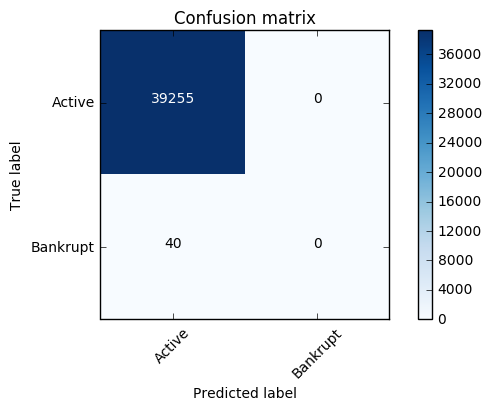

()
Roc Curve:


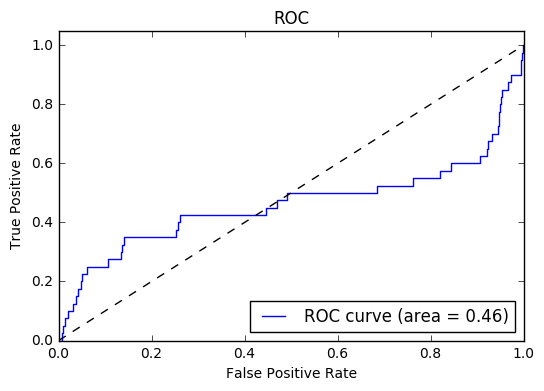

()
*****************************************************************************************
Tuning hyper-parameters for scoring of f1 and class weight of 5
Fitting 11 folds for each of 1 candidates, totalling 11 fits


In [ ]:
models_dict = {}
for score in scores_candidates:
    for class_weight in class_weight_candidates:
        models_dict[(score, class_weight)] = train_model_by_grid_search_cv(
            x_train, 
            x_test, 
            y_train, 
            y_test, 
            estimator_svm_svc_linear,
            score,
            class_weight,
            tuned_parameters,
            ts_iterable,
            probability=True
        )